## Assignment-2

# 1. Read color image and show different channel (10 points)

In [30]:
# Install opencv
# pip install opencv-python

In [31]:
# Import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests


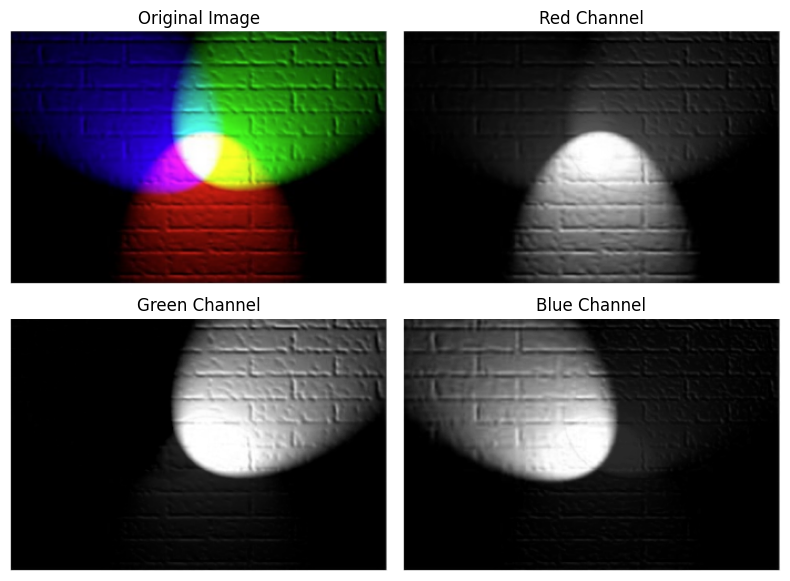

In [32]:
# URL of the image
url = "https://raw.githubusercontent.com/Venkatalakshmikottapalli/Deep-Learning-Image-Processing/main/color.png"

# Fetch the image from the URL
response = requests.get(url, stream=True).raw

# Convert the image to a NumPy array
image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)

# Decode the image
bird_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert BGR to RGB 
convert_bird_image = cv2.cvtColor(bird_image, cv2.COLOR_BGR2RGB)

# Extract grayscale red, green, and blue channels
red_channel = convert_bird_image[:, :, 0]
green_channel = convert_bird_image[:, :, 1]
blue_channel = convert_bird_image[:, :, 2]

# Display images
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.imshow(convert_bird_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(red_channel, cmap='gray')  
plt.title('Red Channel')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(green_channel, cmap='gray')  
plt.title('Green Channel')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(blue_channel, cmap='gray')  
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()


# 2. Read bird image and convert it into binary image (10 points)

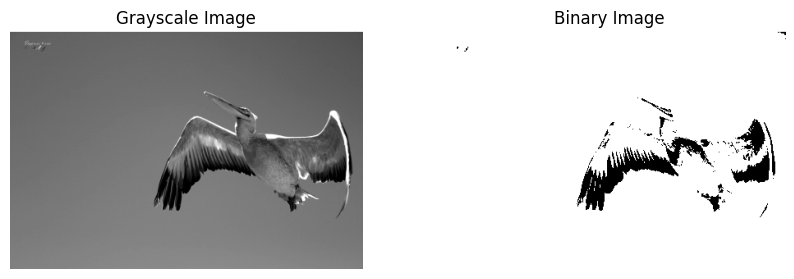

The height length is 290
The width length is 430
The maximum pixel value is 255
The minimum pixel value is 0
Image pixels (row 100-120, col 50-190):
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


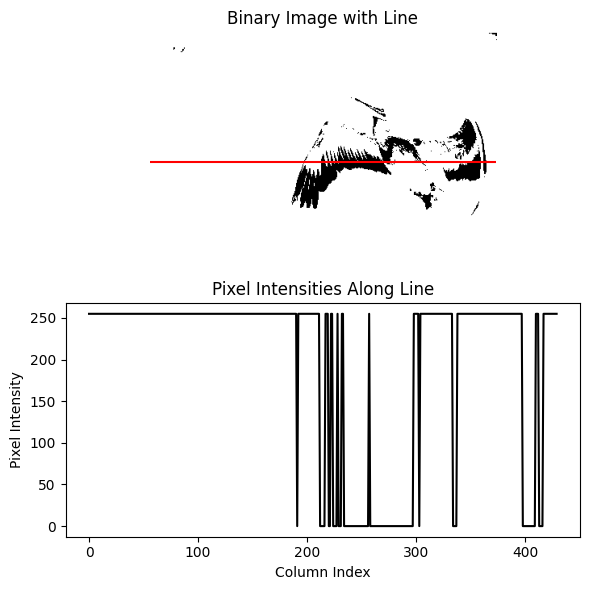

In [33]:
# URL of the image
url = "https://raw.githubusercontent.com/Venkatalakshmikottapalli/Deep-Learning-Image-Processing/main/bird.png"

# Fetch the image from the URL
response = requests.get(url, stream=True).raw

# Convert the image to a NumPy array
image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)

# Decode the image
bird_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert to grayscale
bird_gray_image = cv2.cvtColor(bird_image, cv2.COLOR_BGR2GRAY)

# Convert to binary using Otsu's thresholding
_, binary_image = cv2.threshold(bird_gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and binary images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(bird_gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.show()

# Check the size of the image
height, width = binary_image.shape
print(f'The height length is {height}')
print(f'The width length is {width}')

# Check the maximum and minimum pixel values
print(f'The maximum pixel value is {np.max(binary_image)}')
print(f'The minimum pixel value is {np.min(binary_image)}')

# Print a portion of the image pixels
print("Image pixels (row 100-120, col 50-190):")
print(binary_image[100:120, 50:190])

# Display binary image with a red horizontal line
plt.figure(figsize=(6, 6))

plt.subplot(2, 1, 1)
plt.imshow(binary_image, cmap='gray')
plt.axhline(y=160, color='r', linestyle='-')
plt.title("Binary Image with Line")
plt.axis("off")

# Plot pixel intensities along the red line
plt.subplot(2, 1, 2)
plt.plot(binary_image[160, :], color='black')
plt.title("Pixel Intensities Along Line")
plt.xlabel("Column Index")
plt.ylabel("Pixel Intensity")

plt.tight_layout()
plt.show()


# 3. Read eye image and crop it (10 points)

Image after resizing and keeping it in color: 320 x 480 x 3


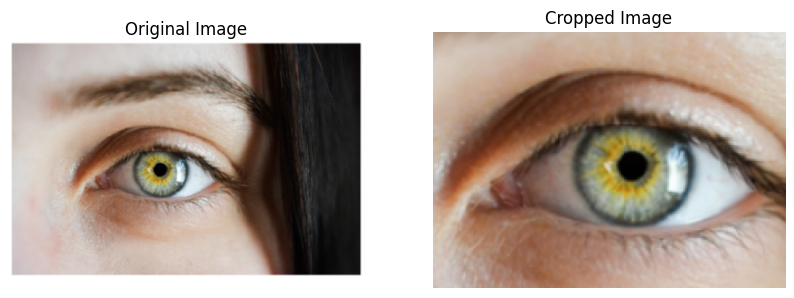

In [34]:
# URL of the image
url = "https://raw.githubusercontent.com/Venkatalakshmikottapalli/Deep-Learning-Image-Processing/main/eye.png"

# Fetch the image from the URL
response = requests.get(url, stream=True).raw

# Convert the image to a NumPy array
image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)

# Decode the image
eye_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert BGR to RGB
converted_eye_image = cv2.cvtColor(eye_image, cv2.COLOR_BGR2RGB)

# Resize the image
resize_image = cv2.resize(converted_eye_image, (480, 320))

# Display the image dimensions
row, col, dim = resize_image.shape
print(f"Image after resizing and keeping it in color: {row} x {col} x {dim}")

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(resize_image)
plt.title("Original Image")
plt.axis("off")

# Crop the image
eye_cropped = resize_image[90:250, 80:300, :]

# Show the cropped image
plt.subplot(1, 2, 2)
plt.imshow(eye_cropped)
plt.title("Cropped Image")
plt.axis("off")

# Display both images
plt.show()


# 4. Read bird and cloud images and add them (10 points)

In [35]:
# Function to fetch image from URL and convert it to grayscale
def fetch_image(url):
    response = requests.get(url, stream=True).raw
    image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)  
    if image is None:
        raise ValueError(f"Error: Could not load image from {url}")
    return image

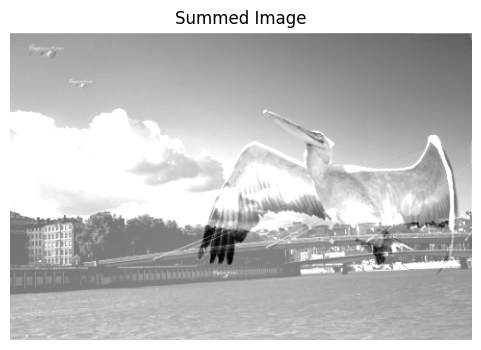

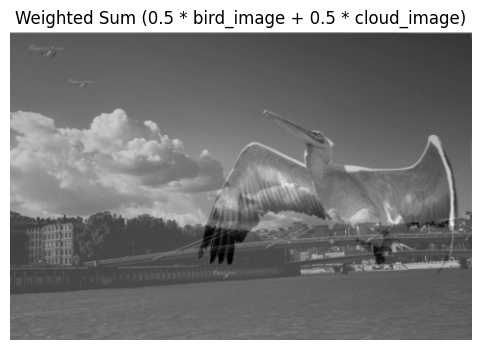

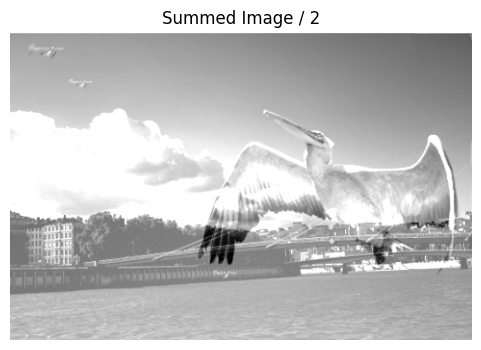

In [36]:
# URLs of images
bird_url = "https://raw.githubusercontent.com/Venkatalakshmikottapalli/Deep-Learning-Image-Processing/main/bird.png"
cloud_url = "https://raw.githubusercontent.com/Venkatalakshmikottapalli/Deep-Learning-Image-Processing/main/cloud.png"

# Fetch images
bird_image = fetch_image(bird_url)
cloud_image = fetch_image(cloud_url)

# Resize images
target_size = (480, 320)
bird_resize_image = cv2.resize(bird_image, target_size)
cloud_resize_image = cv2.resize(cloud_image, target_size)

# Add the two images
summed = cv2.add(bird_resize_image, cloud_resize_image)

# Display summed image
plt.figure(figsize=(6, 4))
plt.imshow(summed, cmap="gray")
plt.title("Summed Image")
plt.axis("off")
plt.show()

# Display weighted sum
blended1 = cv2.addWeighted(bird_resize_image, 0.5, cloud_resize_image, 0.5, 0)

plt.figure(figsize=(6, 4))
plt.imshow(blended1, cmap="gray")
plt.title("Weighted Sum (0.5 * bird_image + 0.5 * cloud_image)")
plt.axis("off")
plt.show()

# Display summed image divided by 2
summed_half = (summed / 2).astype(np.uint8)  

plt.figure(figsize=(6, 4))
plt.imshow(summed_half, cmap="gray")
plt.title("Summed Image / 2")
plt.axis("off")
plt.show()


# 5. Read bird and cat images, then implement blendImg function (10 points)

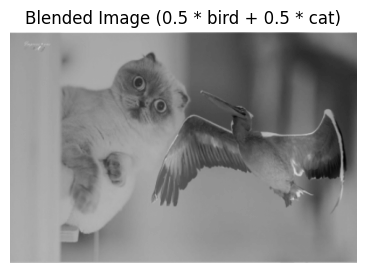

In [37]:
# URLs of images
bird_url = "https://raw.githubusercontent.com/Venkatalakshmikottapalli/Deep-Learning-Image-Processing/main/bird.png"
cat_url = "https://raw.githubusercontent.com/Venkatalakshmikottapalli/Deep-Learning-Image-Processing/main/cat.png"

# Fetch images
bird_image = fetch_image(bird_url)
cat_image = fetch_image(cat_url)

# Resize images to match dimensions
target_size = (480, 320)
bird_resize_image = cv2.resize(bird_image, target_size)
cat_resize_image = cv2.resize(cat_image, target_size)

# Blend images with weights
blended_img = cv2.addWeighted(bird_resize_image, 0.5, cat_resize_image, 0.5, 0)

# Display the blended image
plt.figure(figsize=(5, 3))
plt.imshow(blended_img, cmap='gray')
plt.title("Blended Image (0.5 * bird + 0.5 * cat)")
plt.axis("off")
plt.show()


# 6. Read BM_lowCont image and plot the histogram and perform Equalization (10 points)

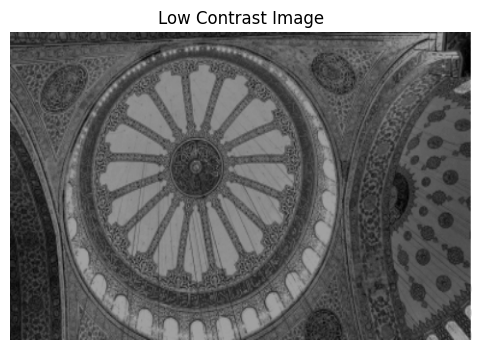

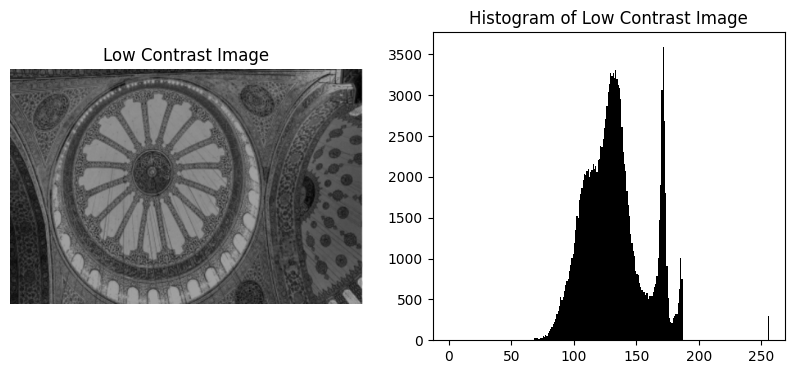

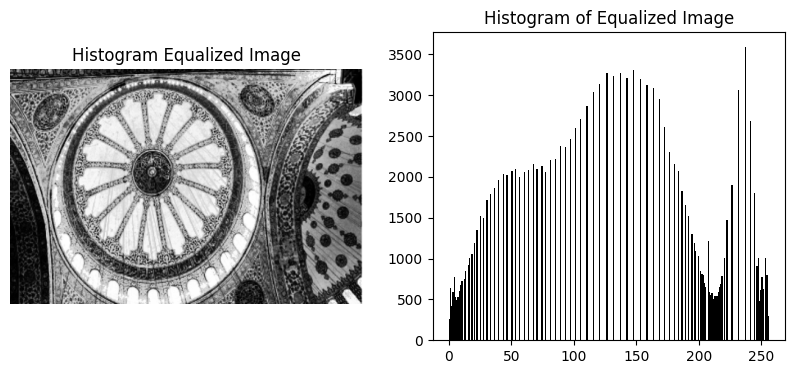

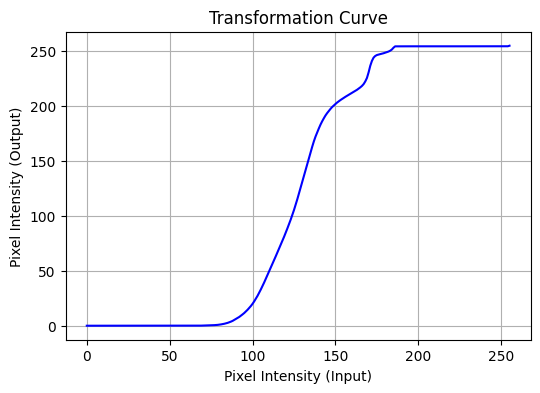

In [38]:
# URL of the low contrast image
bm_lowcont_url = "https://raw.githubusercontent.com/Venkatalakshmikottapalli/Deep-Learning-Image-Processing/main/BM_lowCont.png"

# Fetch image 
bm_lowcont = fetch_image(bm_lowcont_url)

# Resize image
resized_bm_lowcont = cv2.resize(bm_lowcont, (480, 320))

# Display the low contrast image
plt.figure(figsize=(6, 4))
plt.imshow(resized_bm_lowcont, cmap='gray')
plt.title("Low Contrast Image")
plt.axis("off")
plt.show()

# Plot image and histogram
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(resized_bm_lowcont, cmap='gray')
plt.title("Low Contrast Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.hist(resized_bm_lowcont.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Histogram of Low Contrast Image")

plt.show()

# Histogram Equalization
J = cv2.equalizeHist(resized_bm_lowcont)

# Display equalized image and histogram
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(J, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.hist(J.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Histogram of Equalized Image")

plt.show()

# Compute the transformation function
hist, bins = np.histogram(resized_bm_lowcont.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * 255 / cdf[-1] 

# Plot the transformation function
plt.figure(figsize=(6, 4))
plt.plot(cdf_normalized, color='blue')
plt.title("Transformation Curve")
plt.xlabel("Pixel Intensity (Input)")
plt.ylabel("Pixel Intensity (Output)")
plt.grid()
plt.show()


# 7. Read bridge image and add salt & pepper noise (10 points)

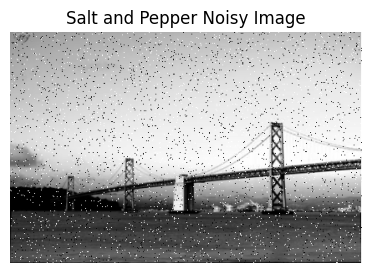

In [39]:
# Function to add salt and pepper noise
def add_salt_and_pepper_noise(image, salt_prob):
    noisy_image = image.copy()
    total_pixels = image.size
    num_salt = int(salt_prob * total_pixels)
    
    # Salt noise (white pixels)
    for _ in range(num_salt):
        row = np.random.randint(0, image.shape[0])
        col = np.random.randint(0, image.shape[1])
        noisy_image[row, col] = 255  

    # Pepper noise (black pixels)
    num_pepper = int(salt_prob * total_pixels)
    for _ in range(num_pepper):
        row = np.random.randint(0, image.shape[0])
        col = np.random.randint(0, image.shape[1])
        noisy_image[row, col] = 0  

    return noisy_image

# URL of the image
image_url = "https://raw.githubusercontent.com/Venkatalakshmikottapalli/Deep-Learning-Image-Processing/main/bridge.png"

# Fetch image
image = fetch_image(image_url)

# Add salt and pepper noise to the image
salt_pepper_noisy_image = add_salt_and_pepper_noise(image, salt_prob=0.02)

# Display the noisy image
plt.figure(figsize=(5, 3))
plt.imshow(salt_pepper_noisy_image, cmap='gray')
plt.title('Salt and Pepper Noisy Image')
plt.axis('off')
plt.show()


# 8. Plot Gaussian function (10 points)

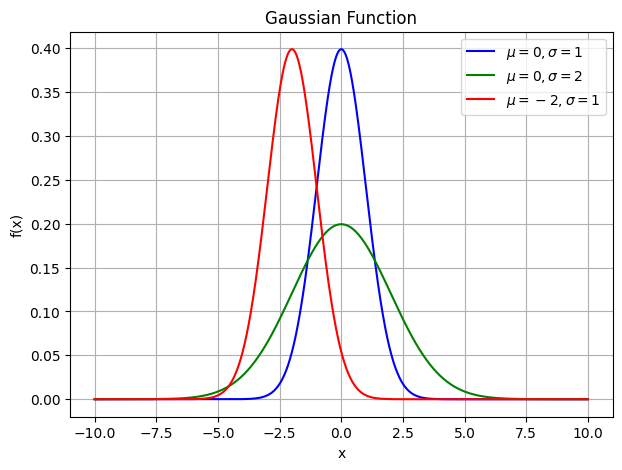

In [40]:
# Define the Gaussian function
def gaussian(x, mu, sigma):
    return (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Generate values for x
x = np.linspace(-10, 10, 1000)

# Compute Gaussian functions 
y1 = gaussian(x, mu=0, sigma=1)   
y2 = gaussian(x, mu=0, sigma=2)   
y3 = gaussian(x, mu=-2, sigma=1)  

# Plot the Gaussian functions
plt.figure(figsize=(7, 5))
plt.plot(x, y1, label=r'$\mu=0, \sigma=1$', color='b')
plt.plot(x, y2, label=r'$\mu=0, \sigma=2$', color='g')
plt.plot(x, y3, label=r'$\mu=-2, \sigma=1$', color='r')

plt.title('Gaussian Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


# 9. Add random and Gaussian noise (20 points)

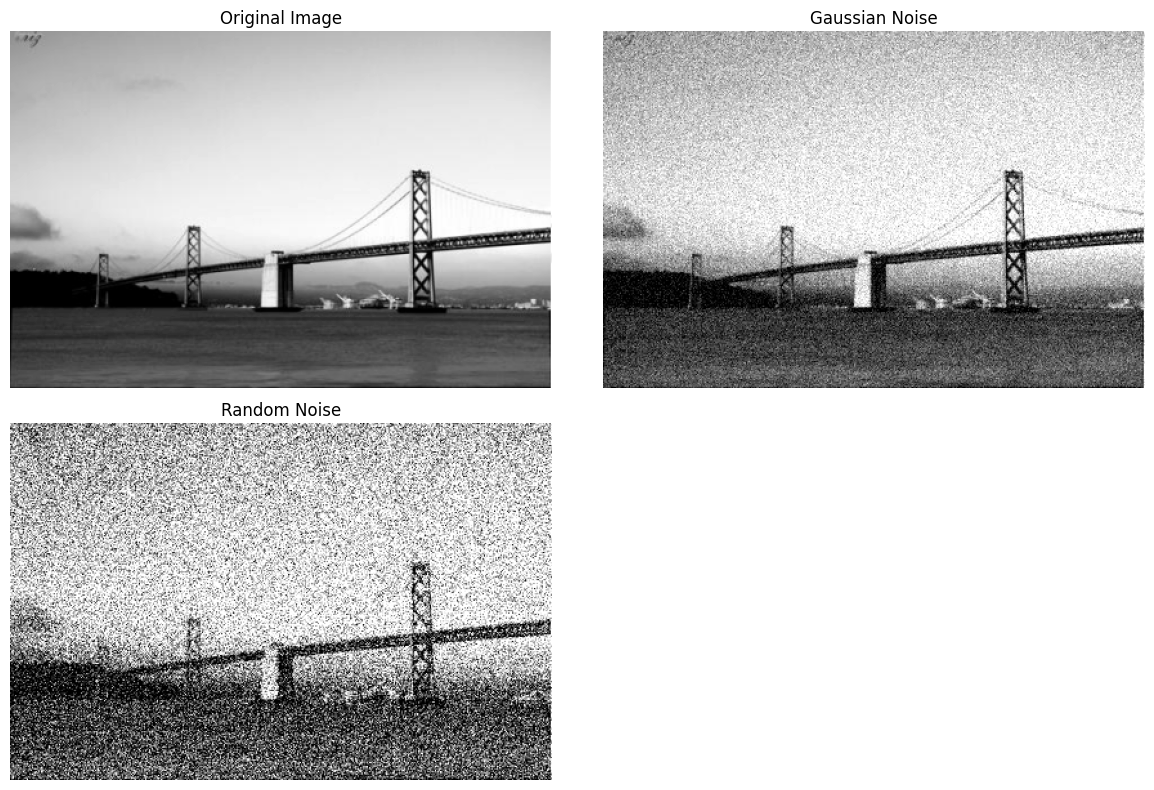

In [41]:
# Function to fetch an image from a URL
def fetch_image(url):
    response = requests.get(url, stream=True).raw
    image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)  
    return image

# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=25):
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.int16)
    noisy_image = cv2.add(image.astype(np.int16), gaussian_noise)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Function to add random noise
def add_random_noise(image, sigma=0.3):
    random_noise = np.random.randn(*image.shape) * sigma * 255
    noisy_image = np.clip(image + random_noise, 0, 255).astype(np.uint8)
    return noisy_image

# URL of the image
image_url = "https://raw.githubusercontent.com/Venkatalakshmikottapalli/Deep-Learning-Image-Processing/refs/heads/main/bridge.png"

# Fetch the grayscale image
bridge_image = fetch_image(image_url)

# Apply different types of noise
gaussian_noise_image = add_gaussian_noise(bridge_image, sigma=25)
random_noise_image = add_random_noise(bridge_image, sigma=0.3)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(bridge_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(gaussian_noise_image, cmap='gray')
plt.title("Gaussian Noise")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(random_noise_image, cmap='gray')
plt.title("Random Noise")
plt.axis("off")

plt.tight_layout()
plt.show()